# Tidy Data Project 

This project is part of the *Elements of Computing II Portfolio Update 2* and demonstrates the principles of **tidy data** using Python.

The project consists of three parts:
- Data Cleaning & Tidy Process 
- Visualizations 
- Pivot Tables 

## Data Cleaning & Tidy Process

In this part of the project, we will download the data and reshape and transform the dataset so that it adheres the tidy data principles: 
- each variable is in its own column 
- each observation forms its own row 
- each type of observational unit forms its own table 

We will start by setting up libraries, downloading the dataset, and printing it out to see what type of data we are dealing with

In [11]:
# Import the pandas library and alias it as 'pd' for easier access to data manipulation functions.
import pandas as pd
# Import the matplotlib library for creating visualizations, specifically for plotting, and alias it as 'plt'.
import matplotlib.pyplot as plt
# Import the seaborn library, which is built on top of matplotlib, for statistical data visualization, and alias it as 'sns'.
import seaborn as sns

In [12]:
# Change the scientific format of numbers to human understandable format in the whole notebook
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
# Load the dataset from the CSV file into a pandas DataFrame.
rd_budget_df = pd.read_csv('data/rd_data.csv')
# Print the entire DataFrame to view all rows and columns.
print(rd_budget_df)

   department  1976_gdp1790000000000.0  1977_gdp2028000000000.0  \
0         DHS                      NaN                      NaN   
1         DOC             819000000.00             837000000.00   
2         DOD           35696000000.00           37967000000.00   
3         DOE           10882000000.00           13741000000.00   
4         DOT            1142000000.00            1095000000.00   
5         EPA             968000000.00             966000000.00   
6         HHS            9226000000.00            9507000000.00   
7    Interior            1152000000.00            1082000000.00   
8        NASA           12513000000.00           12553000000.00   
9         NIH            8025000000.00            8214000000.00   
10        NSF            2372000000.00            2395000000.00   
11      Other            1191000000.00            1280000000.00   
12       USDA            1837000000.00            1796000000.00   
13         VA             404000000.00             374000000.0

### Dataset Overview

The dataset contains 14 rows and 43 columns. Each row represents a department, while each column corresponds to a specific year and its associated budget. However, the dataset is not in a tidy format, as the column headers represent values, rather than variable names. 

In a tidy dataset, each variable should be represented by a separate column. Therefore, the dataset needs to be reshaped to follow this convention, with each department's budget for each year structured as distinct columns.

In [14]:
# Gather columns into rows using melt function

# Reshape the DataFrame using the melt function. 'department' remains as the identifier, while the other columns (years) are 
# gathered into two new columns: 'year_gdp' (containing the year and gdp information) and 'budget' (containing the corresponding budget values).
rd_budget_long = rd_budget_df.melt(id_vars=["department"], var_name="year_gdp", value_name="budget")
# Print the reshaped DataFrame to see the transformation.
print(rd_budget_long)

    department                  year_gdp         budget
0          DHS   1976_gdp1790000000000.0            NaN
1          DOC   1976_gdp1790000000000.0   819000000.00
2          DOD   1976_gdp1790000000000.0 35696000000.00
3          DOE   1976_gdp1790000000000.0 10882000000.00
4          DOT   1976_gdp1790000000000.0  1142000000.00
..         ...                       ...            ...
583        NIH  2017_gdp19177000000000.0 33052000000.00
584        NSF  2017_gdp19177000000000.0  6040000000.00
585      Other  2017_gdp19177000000000.0  1553000000.00
586       USDA  2017_gdp19177000000000.0  2625000000.00
587         VA  2017_gdp19177000000000.0  1367000000.00

[588 rows x 3 columns]


### Reshaping the Dataset

The code above reshapes the dataset using the `melt` function. The `department` column remains unchanged in the new format, while the year columns are combined into a single column named `year_gdp`. The values from the year columns are placed into a new column called `budget`.

After this transformation, the dataset now contains 588 rows and 3 columns. The first column represents the department, the second contains the year along with the GDP data, and the third column represents the corresponding budget. However, this is still not a tidy format, as the second column combines two variables (year and GDP).

To achieve a tidy format, we need to split the second column into two separate columns: one for the year and one for the GDP data.

In [15]:
# Split the "year_gdp" column at the underscore ("_") and take the first part (the year), storing it in a new column called "year".
rd_budget_long["year"] = rd_budget_long["year_gdp"].str.split("_").str[0]
# Split the "year_gdp" column at the underscore and take the second part (the GDP value), then remove the "gdp" prefix from it. Store the result in a new column called "gdp".
rd_budget_long["gdp"] = rd_budget_long["year_gdp"].str.split("_").str[1].str.replace("gdp", "", regex=False)
# Remove the original "year_gdp" column.
rd_budget_long = rd_budget_long.drop(columns=["year_gdp"])
# Convert "year" and "gdp" to numeric types. Any non-numeric values will be set to NaN (due to errors="coerce").
rd_budget_long["year"] = pd.to_numeric(rd_budget_long["year"], errors="coerce")
rd_budget_long["gdp"] = pd.to_numeric(rd_budget_long["gdp"], errors="coerce")
# Print the final reshaped DataFrame with the "year" and "gdp" columns properly formatted and numeric.
print(rd_budget_long)

    department         budget  year               gdp
0          DHS            NaN  1976  1790000000000.00
1          DOC   819000000.00  1976  1790000000000.00
2          DOD 35696000000.00  1976  1790000000000.00
3          DOE 10882000000.00  1976  1790000000000.00
4          DOT  1142000000.00  1976  1790000000000.00
..         ...            ...   ...               ...
583        NIH 33052000000.00  2017 19177000000000.00
584        NSF  6040000000.00  2017 19177000000000.00
585      Other  1553000000.00  2017 19177000000000.00
586       USDA  2625000000.00  2017 19177000000000.00
587         VA  1367000000.00  2017 19177000000000.00

[588 rows x 4 columns]


### Data Cleaning and Transformation

In this step, I cleaned the "year_gdp" column by splitting it into two parts using the `split()` function at the underscore ("_"). I extracted the first part (the year) and created a new column called "year". For the second part, I extracted the GDP value and removed the "gdp" prefix by replacing it with an empty string. 

To avoid redundancy, I dropped the original "year_gdp" column using the `drop()` method. Next, I converted the "year" and "gdp" columns to numeric types so they can be used for calculations and other operations in future analysis.

While this format is now cleaner, ideally, I want to reshape it so that years become column headers and GDP values are displayed as the corresponding data. Although this approach might be more convenient for visualization, it does not align with the principles of tidy data. In the next lines of code, I will show how the dataset might have looked if I had reshaped it this way. However, we will not be using this format, as it does not adhere to the tidy data principles.

In [16]:
# Reshape the data by pivoting the 'year' column into individual columns and 'budget' as the values

rd_budget_messy = rd_budget_long.pivot(index="department", columns="year", values="budget")
rd_budget_messy.head()

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
department,,,,,,,,,,,,,,,,,,,,,
DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1155000000.00,1258000000.00,1009000000.00,848000000.00,527000000.00,737000000.00,1092000000.00,960000000.00,602000000.00,735000000.00
DOC,819000000.00,837000000.00,871000000.00,952000000.00,945000000.00,829000000.00,693000000.00,700000000.00,755000000.00,789000000.00,...,1379000000.00,1594000000.00,1521000000.00,1357000000.00,1373000000.00,1397000000.00,1641000000.00,1596000000.00,1730000000.00,1824000000.00
DOD,35696000000.00,37967000000.00,37022000000.00,37174000000.00,37005000000.00,41737000000.00,46893000000.00,51008000000.00,58139000000.00,64416000000.00,...,94247000000.00,93527000000.00,94325000000.00,88220000000.00,81543000000.00,70583000000.00,70341000000.00,69522000000.00,75213000000.00,51862000000.00
DOE,10882000000.00,13741000000.00,15663000000.00,15612000000.00,15226000000.00,14798000000.00,12160000000.00,11129000000.00,11731000000.00,12043000000.00,...,11343000000.00,11823000000.00,12329000000.00,11902000000.00,11839000000.00,11528000000.00,12686000000.00,15033000000.00,15504000000.00,15032000000.00
DOT,1142000000.00,1095000000.00,1156000000.00,1004000000.00,1048000000.00,978000000.00,702000000.00,800000000.00,1018000000.00,885000000.00,...,1016000000.00,1062000000.00,1221000000.00,1064000000.00,1007000000.00,881000000.00,843000000.00,926000000.00,910000000.00,936000000.00


### Data Reshaping and Tidy Data Principles

The table above may be useful for certain types of data analysis, modeling, or visualizations. However, it does not adhere to the principles of tidy data, where each variable should have its own column. According to tidy data principles, each observation should be represented as a row, and each variable should be represented as a column. Therefore, we will stick with the previous table as the tidy format.

In [17]:
print(rd_budget_long)

    department         budget  year               gdp
0          DHS            NaN  1976  1790000000000.00
1          DOC   819000000.00  1976  1790000000000.00
2          DOD 35696000000.00  1976  1790000000000.00
3          DOE 10882000000.00  1976  1790000000000.00
4          DOT  1142000000.00  1976  1790000000000.00
..         ...            ...   ...               ...
583        NIH 33052000000.00  2017 19177000000000.00
584        NSF  6040000000.00  2017 19177000000000.00
585      Other  1553000000.00  2017 19177000000000.00
586       USDA  2625000000.00  2017 19177000000000.00
587         VA  1367000000.00  2017 19177000000000.00

[588 rows x 4 columns]


Our tidy dataset has 4 variables and therefore 4 columns - department, budget, year, and gdp. 

Next, I will focus on identifying any missing values in the dataset.

In [18]:
# Calculate the number of missing values for each variable (column) in the DataFrame

# Use the 'isnull()' function to check for missing values (NaN) in the DataFrame, then sum the missing values per column.
missing_per_variable = rd_budget_long.isnull().sum()
# Print the total number of missing values for each variable to inspect the result.
print(missing_per_variable)

department     0
budget        26
year           0
gdp            0
dtype: int64


In [19]:
# Calculate the number of missing values for each department (row) in the DataFrame

# Use the reshaped "messy" table, where years are columns and budgets are the values, since the missing values are only present in the "budget" column 
# to find the department with missing values.
missing_per_department = rd_budget_messy.isnull().sum(axis=1)
print(missing_per_department)

department
DHS         26
DOC          0
DOD          0
DOE          0
DOT          0
EPA          0
HHS          0
Interior     0
NASA         0
NIH          0
NSF          0
Other        0
USDA         0
VA           0
dtype: int64


In [20]:
# Calculate the total number of missing values in the entire DataFrame

# The first 'sum()' calculates the number of missing values in each column (variable), 
# and the second 'sum()' adds up those values to get the total number of missing values in the entire DataFrame.
total_missing = rd_budget_long.isnull().sum().sum()
# Print the total count of missing values.
print("Total missing values:", total_missing)

Total missing values: 26


### Missing Values Exploration

I have explored the missing values across different dimensions: columns, departments, and in total. It turns out that the only missing values are found in the "budget" column for the DHS department. The data for this department starts in 2002, which is why there are missing values for the years prior to this.

Overall, the data is clean, with only a few missing values in a specific department and column. For the purpose of this analysis, I won't be replacing the missing values with 0 or anything else because the missing values represent that there just were not any observations for the DHS department from 1976 to 2002. Since there were no observations for these years I think it will be reasonable to delete the rows. 

In [21]:
rd_budget_long = rd_budget_long.dropna()

print(rd_budget_long)

    department         budget  year               gdp
1          DOC   819000000.00  1976  1790000000000.00
2          DOD 35696000000.00  1976  1790000000000.00
3          DOE 10882000000.00  1976  1790000000000.00
4          DOT  1142000000.00  1976  1790000000000.00
5          EPA   968000000.00  1976  1790000000000.00
..         ...            ...   ...               ...
583        NIH 33052000000.00  2017 19177000000000.00
584        NSF  6040000000.00  2017 19177000000000.00
585      Other  1553000000.00  2017 19177000000000.00
586       USDA  2625000000.00  2017 19177000000000.00
587         VA  1367000000.00  2017 19177000000000.00

[562 rows x 4 columns]


In [23]:
total_missing = rd_budget_long.isnull().sum().sum()
print("Total missing values:", total_missing)

Total missing values: 0


After deleeting the rows with missing values using the dropna method, we have 562 rows instead of 588 left, which corresponds to 26 observations getting deleted. Since for each observation, only the budget data is important, and gdp is overall gdp across all departments, I think its reasonable to keep the data without observations from the years that does not have the data. 

### Conclusion of Data Tidying

At this point, we have successfully tidied the dataset by reshaping it into a more structured format. We have addressed missing values, cleaned up columns, and ensured that the data adheres to tidy data principles. The dataset is now ready for further analysis.

Next, we will shift our focus to visualizing the data. Visualization will be a key tool in making the analysis easier to interpret and communicate.

## Visualizations

### Visualization 1 - 

Explanation 

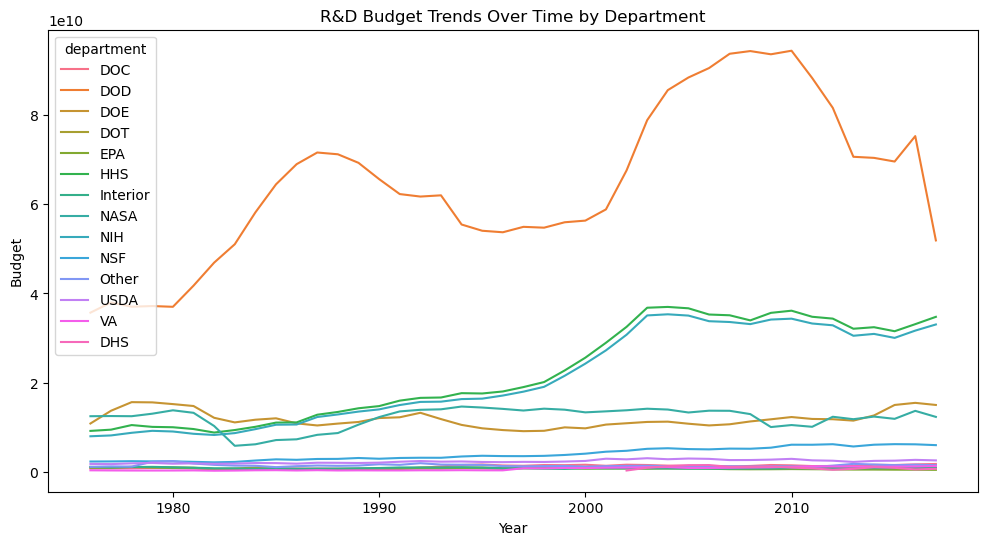

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=rd_budget_long, x="year", y="budget", hue="department")
plt.title("R&D Budget Trends Over Time by Department")
plt.xlabel("Year")
plt.ylabel("Budget")
plt.show()

Since theere are 14 deoartments and the spendings vary a lot, its very hard to grasp the clear spending patterns for each department for this visuyalization. In this visualization, the departments with largest spendings are clearly seen - DOD (Deparment of Defense), DOE (Department of Energy), NASA (National Aeronautics and Space Administration), HHS (Department of Health and Human Services), NIH (National Institute of Health) and they stand out. It is understandable because ___ 

However, others that have similar nu,bers are just blend together. I want to take a closer look at other remaining departments to identify their growth patterns and make conclusions. 

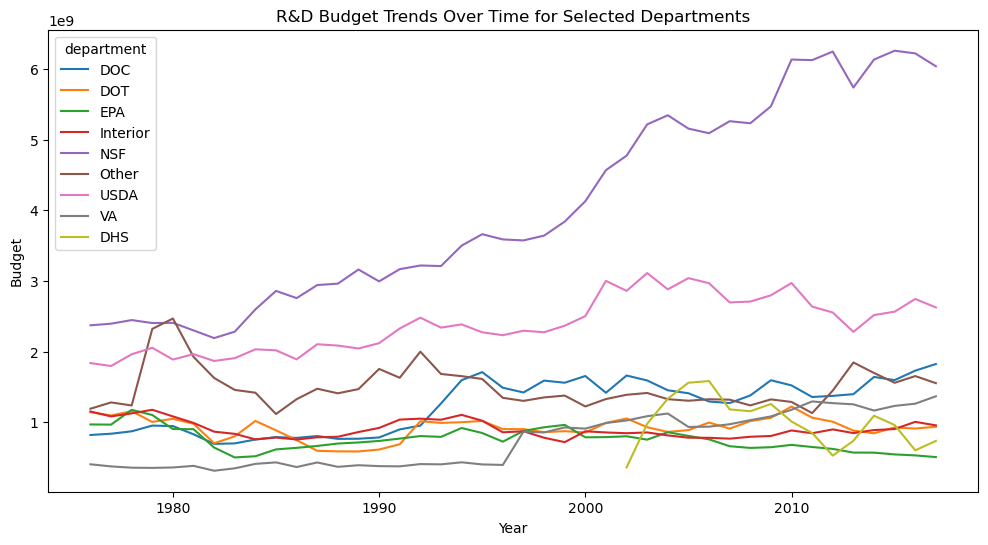

In [25]:
# Filter the dataset for specific departments
selected_departments = ["DOC", "DOT", "EPA", "Interior", "NSF", "Other", "USDA", "VA", "DHS"]
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x="year", y="budget", hue="department")
plt.title("R&D Budget Trends Over Time for Selected Departments")
plt.xlabel("Year")
plt.ylabel("Budget")
plt.show()

Now as we see the spending patterns of all departments more closely, we can make some conclusions from these specific visualizations of lineplots: 
1. DOD or the department of Defense, as having the highest R&D spending across all years fluctuate a lot. Which is not the case for most of the other departments that despite small fluctuations stay in the almnost the same spending range. The reason for this might be because ....
2. Spendings of HHS (Department of Health and Human Services), NIH (National Institute of Health), and NSF (National Science Foundation) grew over years with slight fluctuations. 
3. All other depadtemts stayed in generally the same rage with slight growths and fluctuations over years and generally this has been a pattern. 
4. Specifially for the case of DHS, or the department of Homeland Security, which is the only department that had missing values we can see that the visualziation properly showcases that the department did not have any R&D spending information befoe the beginning of 2000s (2002 to be precise), because we deleted the rows with the mossing observations. This gives us a hint that we made the right choice to delete those observations bvecasue we do not have them in our visualization and its clearly seen that the data just starts from that year. 

I also want to compare the total sum of the spendings by each department so lets see it with abarplot/

/var/folders/vk/yf7z5gmx1ngblj686qfff1j00000gn/T/ipykernel_1363/2221728985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_budget_by_department, x="budget", y="department", palette="viridis")


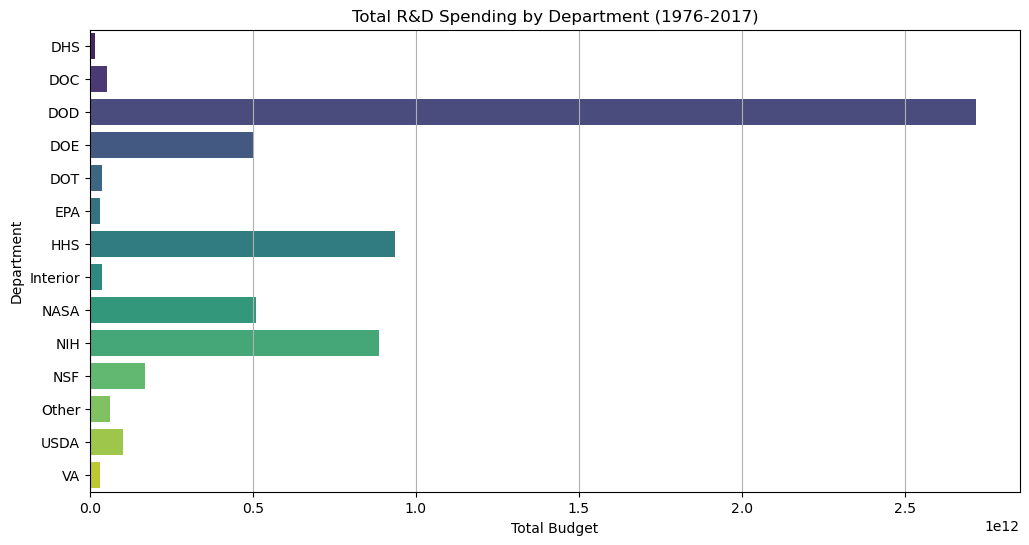

In [26]:
plt.figure(figsize=(12, 6))
total_budget_by_department = rd_budget_long.groupby("department")["budget"].sum().reset_index()
sns.barplot(data=total_budget_by_department, x="budget", y="department", palette="viridis")
plt.title("Total R&D Spending by Department (1976-2017)")
plt.xlabel("Total Budget")
plt.ylabel("Department")
plt.grid(axis="x")
plt.show()

In this visualization, its again clearly seen how Dod, HHS, NIH, NASA, and DOE departments have the highest spemndings. Others kind of blend with each other and are not very identifyiable so lets take a closer look at each of them. 

/var/folders/vk/yf7z5gmx1ngblj686qfff1j00000gn/T/ipykernel_1363/1018156251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_budget_by_department, x="budget", y="department", palette="viridis")


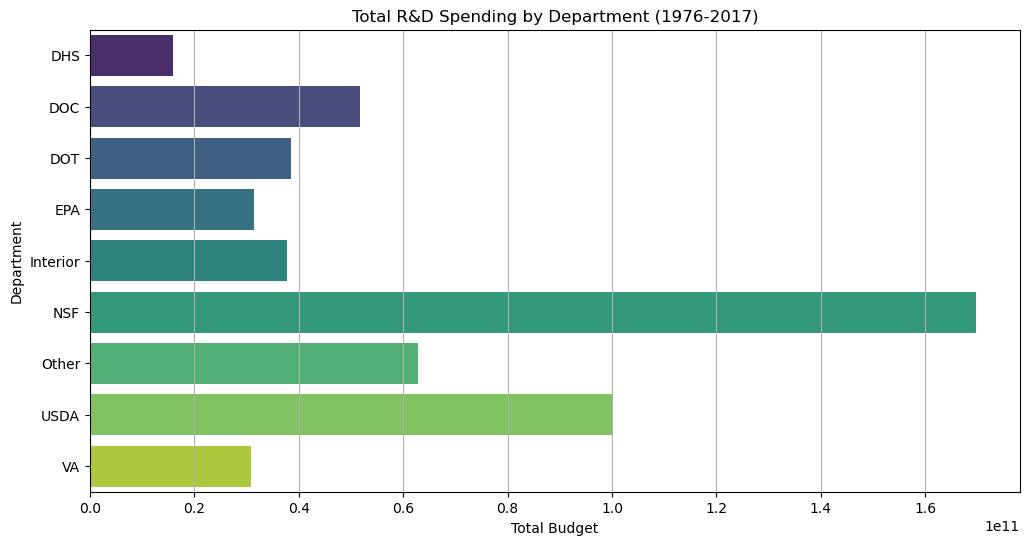

In [27]:
# Filter the dataset for specific departments
selected_departments = ["DOC", "DOT", "EPA", "Interior", "NSF", "Other", "USDA", "VA", "DHS"]
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]

# Plot
plt.figure(figsize=(12, 6))
total_budget_by_department = filtered_data.groupby("department")["budget"].sum().reset_index()
sns.barplot(data=total_budget_by_department, x="budget", y="department", palette="viridis")
plt.title("Total R&D Spending by Department (1976-2017)")
plt.xlabel("Total Budget")
plt.ylabel("Department")
plt.grid(axis="x")
plt.show()

Here we can see that NSF is the next highest spending department, followed by USDA (US Department of Agriculture), and Other research and development spending. 

General Conclusion 

Generally, each department has similar spendings year over year with minor fluctuations which is understandable. Some departments that are more important to the function of a government had hgh oytstanding spendings compared to the rest. Some departments that grew over years had growing spendings accordingly. Now I want to see how these spending patterns correlated with GDP and how GDP change affected spendings. 

### Visualization 2 - 

Explanation

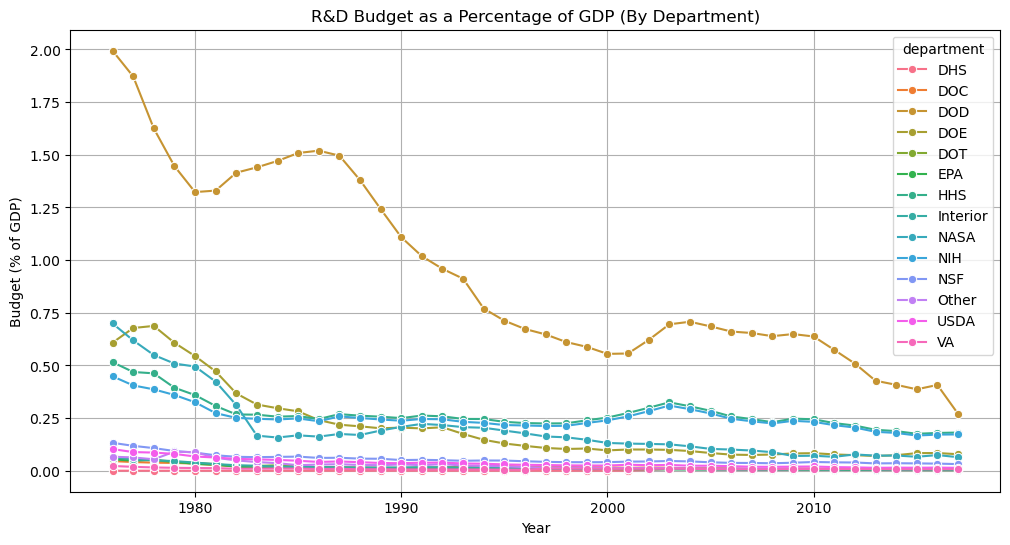

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=rd_budget_long, x="year", y=rd_budget_long["budget"] / rd_budget_long["gdp"] * 100, hue="department", marker="o")
plt.title("R&D Budget as a Percentage of GDP (By Department)")
plt.xlabel("Year")
plt.ylabel("Budget (% of GDP)")
plt.grid(True)
plt.show()

Here we have the same problem that we can clearly see the percentage of only one department - DOD, which occupies the highest percentage of the GDP. The emerging trend is that the percentage goes down year over year significantly, frpm 2% tp 0.25%. Even though as we have seen in the previous visualization, the spending itself fluctuates a lot, the decrease in percentage sugests that GDP grew by a lot and the smae spending amonunt became a smaller fraction. Let;s divide our departments into 2 and look closer at them. 

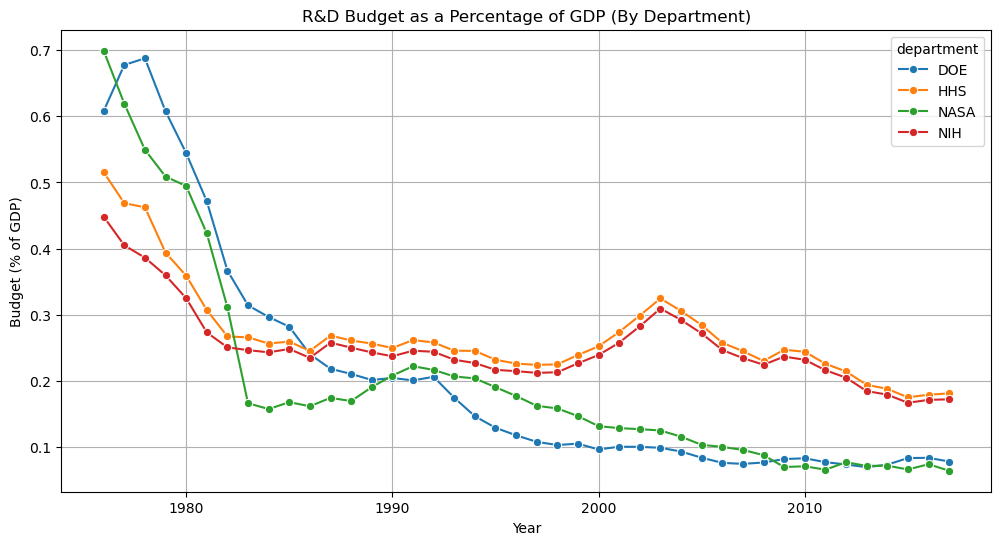

In [28]:
# Filter the dataset for specific departments
selected_departments = ["HHS", "DOE", "NASA", "NIH"]
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x="year", y=rd_budget_long["budget"] / rd_budget_long["gdp"] * 100, hue="department", marker="o")
plt.title("R&D Budget as a Percentage of GDP (By Department)")
plt.xlabel("Year")
plt.ylabel("Budget (% of GDP)")
plt.grid(True)
plt.show()

For the next 4 (the following 4 by the spending) - DOE, HHS, NASA, NIH, the percentage goes down again. The figures are very similar for all 4 of these. Even though for some of these departments the spending even incrased, the total percentage of the spending of GDP over years has decreased as well, which is consistent with DOD. the increase was not as significant as thw increase in GDP, which made the fraction get smaller and smaller. 

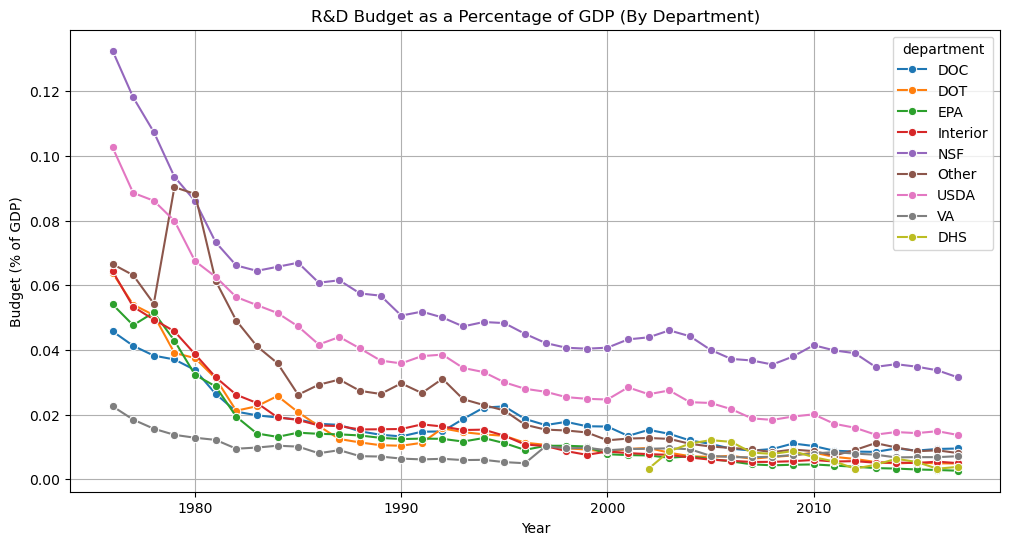

In [29]:
# Filter the dataset for specific departments
selected_departments = ["DOC", "DOT", "EPA", "Interior", "NSF", "Other", "USDA", "VA", "DHS"]
filtered_data = rd_budget_long[rd_budget_long["department"].isin(selected_departments)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x="year", y=rd_budget_long["budget"] / rd_budget_long["gdp"] * 100, hue="department", marker="o")
plt.title("R&D Budget as a Percentage of GDP (By Department)")
plt.xlabel("Year")
plt.ylabel("Budget (% of GDP)")
plt.grid(True)
plt.show()

Now the last group of the rest of the departnensts that did not have significant R&D spendings and each was smaller than 0.1% or about, they all had similar perecnatge decreasing pattern. some of them were nearly the same but generally this has decreased. 

Conclusion: 
the percentage of R&D spending as GDP has decreased across all departments and this has been an emerging and consistent trend acrss all departments. this suggests that even though spending itself despite some year over year fluctuations had not changed a lot the GDO has increased whcih made the fraction smaller and this trend is concistent across both the high and low spending departments. 

### Visualization 3 - 

Explanation 

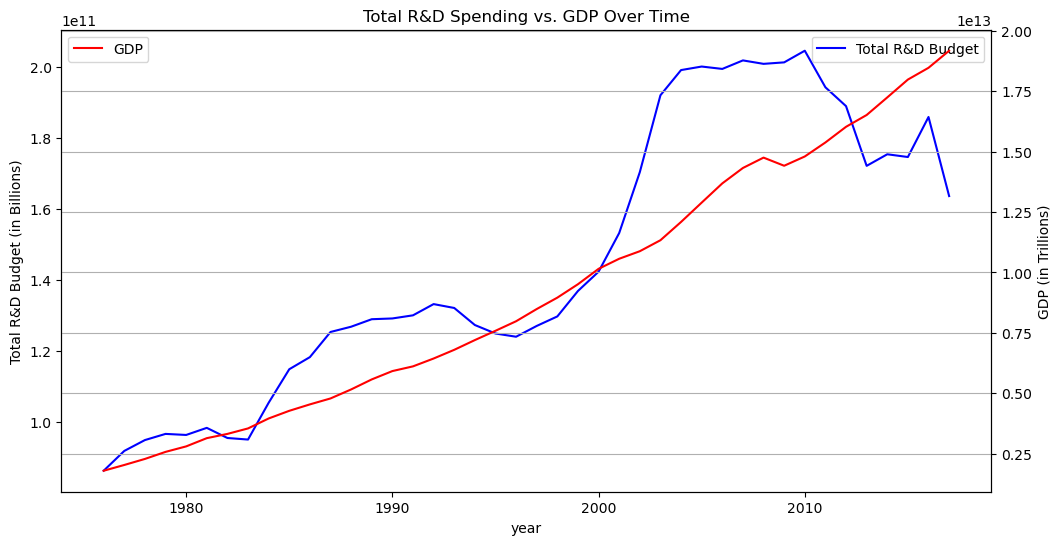

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=rd_budget_long.groupby("year")["budget"].sum().reset_index(), x="year", y="budget", label="Total R&D Budget", color="blue")
ax2 = plt.twinx()
sns.lineplot(data=rd_budget_long.groupby("year")["gdp"].mean().reset_index(), x="year", y="gdp", label="GDP", ax=ax2, color="red")
ax.set_ylabel("Total R&D Budget (in Billions)")
ax2.set_ylabel("GDP (in Trillions)")
plt.title("Total R&D Spending vs. GDP Over Time")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

From this line graph we can clearly see that there was a steady increase in GDP year over year. The total R&D budget increased as well but not as steady and with some fluctuations and generally the number has not increase that much - from about 1 Bn to 1.6Bn, while GDP growth is much higher 0 from 0.25Tn to almost 2 tn,. This explains our previous conclusions and assumptions about fractions and etc so this visualization is consistent with everything else. 

Now lets take a look at nu,bers themeslves and give summaries through Puvot Tsbles 

## Pivot Tables

explanation 

### Pivot Table 1 - 

Explanation 

In [ ]:
pivot_table_transposed = rd_budget_long.pivot_table(values="budget", index="department", columns="year", aggfunc="sum")

# Display the pivot table
print("\nTotal R&D Budget per Department (Rows) per Year (Columns):\n", pivot_table_transposed)


Total R&D Budget per Department (Rows) per Year (Columns):
 year                 1976           1977           1978           1979  \
department                                                               
DHS                  0.00           0.00           0.00           0.00   
DOC          819000000.00   837000000.00   871000000.00   952000000.00   
DOD        35696000000.00 37967000000.00 37022000000.00 37174000000.00   
DOE        10882000000.00 13741000000.00 15663000000.00 15612000000.00   
DOT         1142000000.00  1095000000.00  1156000000.00  1004000000.00   
EPA          968000000.00   966000000.00  1175000000.00  1102000000.00   
HHS         9226000000.00  9507000000.00 10533000000.00 10127000000.00   
Interior    1152000000.00  1082000000.00  1125000000.00  1176000000.00   
NASA       12513000000.00 12553000000.00 12516000000.00 13079000000.00   
NIH         8025000000.00  8214000000.00  8802000000.00  9243000000.00   
NSF         2372000000.00  2395000000.00  244600000

This pivot table is not easy to analyze because there are 4 decades of years and the Jupyter notebook simply cannot display all of them. Let's group years by decades and look at the pivot table of budget. 

In [33]:
pivot_table_transposed = rd_budget_long.pivot_table(
    values="budget", 
    index="department", 
    columns=rd_budget_long["year"] // 10 * 10,  # Convert years to decades
    aggfunc="sum"
)

# Sort by the total budget across all decades in descending order
pivot_table_transposed = pivot_table_transposed.loc[pivot_table_transposed.sum(axis=1).sort_values(ascending=False).index]

# Display the pivot table
print("\nTotal R&D Budget per Department (Rows) per Decade (Columns):\n", pivot_table_transposed)



Total R&D Budget per Department (Rows) per Decade (Columns):
 year                  1970            1980            1990            2000  \
department                                                                   
DOD        147859000000.00 580046000000.00 580148000000.00 807116000000.00   
HHS         39393000000.00 110936000000.00 179389000000.00 337530000000.00   
NIH         34284000000.00 104399000000.00 169154000000.00 322390000000.00   
NASA        50661000000.00  91791000000.00 139167000000.00 132918000000.00   
DOE         55898000000.00 120532000000.00 107752000000.00 109067000000.00   
NSF          9617000000.00  26459000000.00  34397000000.00  50251000000.00   
USDA         7649000000.00  19798000000.00  23090000000.00  28565000000.00   
Other        6029000000.00  15688000000.00  15704000000.00  13188000000.00   
DOC          3479000000.00   7823000000.00  13260000000.00  14722000000.00   
DOT          4397000000.00   7945000000.00   8859000000.00   9558000000.00   
I

This pivot table shows the total R&D budget allocated to different departments in the U.S. across decades (1970s to 2010s).

Conclusions: 
Department of Defense (DOD) Dominates Spending consistently and its sending peaked in 2000s. 
HHS (Health & Human Services) and NIH (National Institutes of Health) have steadily increasing budgets over time.

### Pivot Table 2 - 

Explanation 

In [39]:
# Pivot table to show GDP across years
gdp_pivot = rd_budget_long.pivot_table(values="gdp", index="year", aggfunc="mean")

print(gdp_pivot)

                   gdp
year                  
1976  1790000000000.00
1977  2028000000000.00
1978  2278000000000.00
1979  2570000000000.00
1980  2797000000000.00
1981  3138000000000.00
1982  3314000000000.00
1983  3541000000000.00
1984  3953000000000.00
1985  4270000000000.00
1986  4536000000000.00
1987  4782000000000.00
1988  5155000000000.00
1989  5570000000000.00
1990  5915000000000.00
1991  6110000000000.00
1992  6435000000000.00
1993  6795000000000.00
1994  7198000000000.00
1995  7583000000000.00
1996  7978000000000.00
1997  8483000000000.00
1998  8955000000000.00
1999  9511000000000.00
2000 10148000000000.00
2001 10565000000000.00
2002 10877000000000.00
2003 11332000000000.00
2004 12089000000000.00
2005 12889000000000.00
2006 13685000000000.00
2007 14323000000000.00
2008 14752000000000.00
2009 14415000000000.00
2010 14799000000000.00
2011 15379000000000.00
2012 16027000000000.00
2013 16516000000000.00
2014 17244000000000.00
2015 17983000000000.00
2016 18470000000000.00
2017 191770

In [40]:
gdp_decade_pivot = rd_budget_long.pivot_table(values="gdp", index=rd_budget_long["year"] // 10 * 10, aggfunc="sum")

print(gdp_decade_pivot)

                     gdp
year                    
1970  112658000000000.00
1980  533728000000000.00
1990  974519000000000.00
2000 1730337000000000.00
2010 1898330000000000.00


In [41]:
gdp_decade_pivot = rd_budget_long.pivot_table(values="gdp", index=rd_budget_long["year"] // 10 * 10, aggfunc="mean")

print(gdp_decade_pivot)

                   gdp
year                  
1970  2166500000000.00
1980  4105600000000.00
1990  7496300000000.00
2000 12538673913043.48
2010 16949375000000.00


In [45]:
# Pivot table for yearly total R&D spending and GDP
spending_gdp_pivot = rd_budget_long.pivot_table(
    values=["budget", "gdp"], 
    index="year", 
    aggfunc={"budget": "sum", "gdp": "mean"}  # Mean occurrence of GDP per year
)

# Calculate the percentage of GDP spent on R&D
spending_gdp_pivot["percentage"] = (spending_gdp_pivot["budget"] / spending_gdp_pivot["gdp"]) * 100

print(spending_gdp_pivot)

              budget               gdp  percentage
year                                              
1976  86227000000.00  1790000000000.00        4.82
1977  91807000000.00  2028000000000.00        4.53
1978  94864000000.00  2278000000000.00        4.16
1979  96601000000.00  2570000000000.00        3.76
1980  96305000000.00  2797000000000.00        3.44
1981  98304000000.00  3138000000000.00        3.13
1982  95448000000.00  3314000000000.00        2.88
1983  95010000000.00  3541000000000.00        2.68
1984 105371000000.00  3953000000000.00        2.67
1985 114818000000.00  4270000000000.00        2.69
1986 118231000000.00  4536000000000.00        2.61
1987 125314000000.00  4782000000000.00        2.62
1988 126800000000.00  5155000000000.00        2.46
1989 128912000000.00  5570000000000.00        2.31
1990 129126000000.00  5915000000000.00        2.18
1991 130008000000.00  6110000000000.00        2.13
1992 133172000000.00  6435000000000.00        2.07
1993 132080000000.00  679500000

In [46]:

spending_gdp_decade_pivot = rd_budget_long.pivot_table(
    values=["budget", "gdp"], 
    index= (rd_budget_long["year"] // 10) * 10, 
    aggfunc="sum"  # Sum for the entire decade
)

# Calculate the percentage of GDP spent on R&D per decade
spending_gdp_decade_pivot["percentage"] = (spending_gdp_decade_pivot["budget"] / spending_gdp_decade_pivot["gdp"]) * 100

print(spending_gdp_decade_pivot)

               budget                 gdp  percentage
year                                                 
1970  369499000000.00  112658000000000.00        0.33
1980 1104513000000.00  533728000000000.00        0.21
1990 1294108000000.00  974519000000000.00        0.13
2000 1860451000000.00 1730337000000000.00        0.11
2010 1459359000000.00 1898330000000000.00        0.08


In [47]:

spending_gdp_decade_pivot = rd_budget_long.pivot_table(
    values=["budget", "gdp"], 
    index= (rd_budget_long["year"] // 10) * 10, 
    aggfunc="mean"  # Sum for the entire decade
)

# Calculate the percentage of GDP spent on R&D per decade
spending_gdp_decade_pivot["percentage"] = (spending_gdp_decade_pivot["budget"] / spending_gdp_decade_pivot["gdp"]) * 100

print(spending_gdp_decade_pivot)

             budget               gdp  percentage
year                                             
1970  7105750000.00  2166500000000.00        0.33
1980  8496253846.15  4105600000000.00        0.21
1990  9954676923.08  7496300000000.00        0.13
2000 13481528985.51 12538673913043.48        0.11
2010 13029991071.43 16949375000000.00        0.08
